In [15]:
%matplotlib inline
from pylab import *

In [16]:
from classy import *

In [40]:
images=image.load_images('images/training squares/')
images=remap_targets(images,new_target_names=['blank','player1','player2'])
summary(images)

[player1]: 58 files found
[blank]: 46 files found
[player2]: 56 files found
Images
160 images of shape (50, 50, 3)
Target values given.
Target names: 'blank', 'player1', 'player2'
[blank]: 46 files
[player1]: 58 files
[player2]: 56 files


In [41]:
images['data'][0].shape

(50, 50, 3)

In [42]:
data=image.images_to_vectors(images)

160 vectors of length 7500
Feature names: 'p0', 'p1', 'p2', 'p3', 'p4'  , ... ,  'p7495', 'p7496', 'p7497', 'p7498', 'p7499'  (7500 features)
Target values given.
Target names: 'blank', 'player1', 'player2'
Mean:  [137.15625 144.91875 138.9875  ... 182.66875 186.55    177.63125]
Median:  [153.  161.5 156.  ... 184.  188.  180. ]
Stddev:  [49.87027507 52.84611763 53.1624853  ... 12.93334927 17.7122133
 16.97741952]


In [43]:
data_train,data_test=split(data,test_size=0.2)

Original vector shape:  (160, 7500)
Train vector shape:  (128, 7500)
Test vector shape:  (32, 7500)


## Naive Bayes

In [21]:
C=NaiveBayes()
C.fit(data_train.vectors,data_train.targets)
print("On Training Set:",C.percent_correct(data_train.vectors,data_train.targets))
print("On Test Set:",C.percent_correct(data_test.vectors,data_test.targets))

On Training Set: 100.0
On Test Set: 100.0


In [22]:
C.means

array([[117.65789474, 123.52631579, 115.76315789, ..., 177.73684211,
        183.78947368, 172.21052632],
       [145.0625    , 149.3125    , 145.39583333, ..., 188.39583333,
        190.33333333, 181.95833333],
       [136.04761905, 150.71428571, 142.9047619 , ..., 181.23809524,
        188.78571429, 181.54761905]])

In [23]:
C.means.shape

(3, 7500)

In [24]:
mean0=C.means[0,:]

In [25]:
mean0.shape

(7500,)

In [26]:
im0=mean0.reshape((50,50,3))
im0=im0-im0.min()  # set the min to zero
im0=im0/im0.max()  # set the max to 1

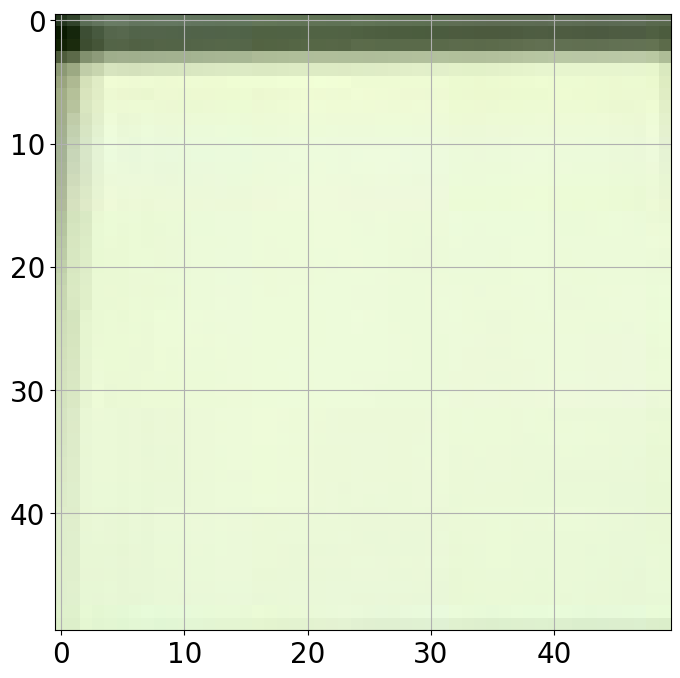

In [27]:
imshow(im0)

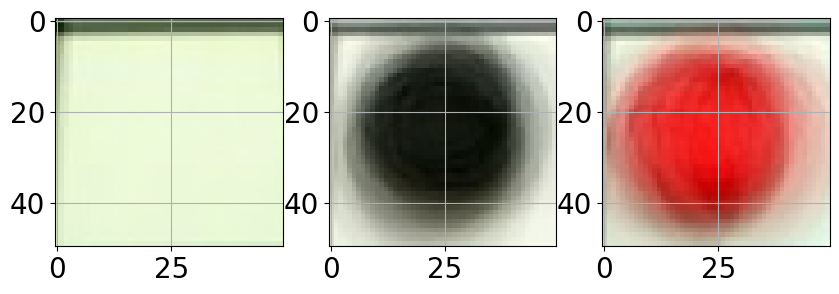

In [28]:
for i in range(3):
    subplot(1,3,i+1)
    mean0=C.means[i,:]
    im0=mean0.reshape((50,50,3))
    im0=im0-im0.min()  # set the min to zero
    im0=im0/im0.max()  # set the max to 1
    imshow(im0)

## CSC

In [44]:
C=CSC()
C.fit(data_train.vectors,data_train.targets)
print("On Training Set:",C.percent_correct(data_train.vectors,data_train.targets))
print("On Test Set:",C.percent_correct(data_test.vectors,data_test.targets))

On Training Set: 100.0
On Test Set: 96.875


In [46]:
C.centers.shape

(18, 7500)

In [47]:
C.targets

array([1, 0, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1])

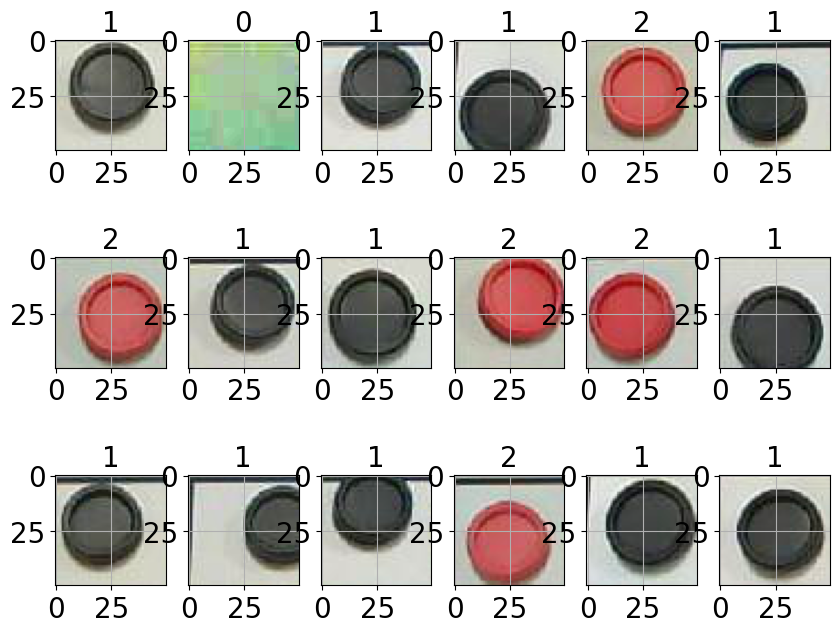

In [50]:
for i in range(18):  # make sure this matches the shape
    subplot(3,6,i+1) # make sure that the 3 and 6 multiply to be greater than or equal to the number of centers

    mean0=C.centers[i,:]
    im0=mean0.reshape((50,50,3))
    im0=im0-im0.min()  # set the min to zero
    im0=im0/im0.max()  # set the max to 1
    imshow(im0) 
    title(C.targets[i])

## kNearestNeighbor -- you can't visualize this classifier.  Why?

## Perceptron

### for neural networks, it helps a lot to standardize the inputs (subtract mean, divide by stdev)

In [29]:
standardize(data)
summary(data)

160 vectors of length 7500
Feature names: 'p0', 'p1', 'p2', 'p3', 'p4'  , ... ,  'p7495', 'p7496', 'p7497', 'p7498', 'p7499'  (7500 features)
Target values given.
Target names: 'blank', 'player1', 'player2'
Mean:  [ 4.57966998e-17  2.49800181e-16 -1.65145675e-16 ...  8.82627305e-16
 -6.82093271e-16  3.37230244e-16]
Median:  [0.31769927 0.31376477 0.32000949 ... 0.10293157 0.08186442 0.13952356]
Stddev:  [1. 1. 1. ... 1. 1. 1.]


In [30]:
data_train,data_test=split(data,test_size=0.2)

Original vector shape:  (160, 7500)
Train vector shape:  (128, 7500)
Test vector shape:  (32, 7500)


In [31]:
data_train.vectors.shape

(128, 7500)

In [32]:
number_of_features=data_train.vectors.shape[1]
number_of_categories=3  # the types of pieces

In [33]:
C=NumPyNetBackProp({
    'input':number_of_features,               # number of features
    'output':(number_of_categories,'linear'),  # number of classes
    'cost':'mse',
})


In [34]:
C.fit(data_train.vectors,data_train.targets,epochs=5000)   # you'll want to increase epochs here

layer       filters  size              input                output
   0 input                   128 x   1 x   1 x7500   ->   128 x   1 x   1 x7500
   1 connected               128 x   1 x   1 x7500   ->   128 x   3
   2 cost                    128 x   1 x   1 x   3   ->   128 x   1 x   1 x   3


100%|███████████████████████████████████████████████████████████| 5000/5000 [03:44<00:00, 22.25it/s]


In [35]:
print(("On Training Set:",C.percent_correct(data_train.vectors,data_train.targets)))
print(("On Test Set:",C.percent_correct(data_test.vectors,data_test.targets)))

('On Training Set:', 100.0)
('On Test Set:', 90.625)


In [36]:
len(C.weights)

1

In [37]:
C.weights[0]  # first layer

array([[-0.01245254, -0.00957184, -0.00452134],
       [-0.01453401, -0.0138162 ,  0.00170475],
       [ 0.01297672, -0.00026557,  0.01424888],
       ...,
       [ 0.0156083 ,  0.02143903,  0.00329524],
       [ 0.00496213, -0.00841738,  0.00200553],
       [ 0.00320016, -0.01065138,  0.0128529 ]])

In [38]:
W=C.weights[0]
W.shape

(7500, 3)

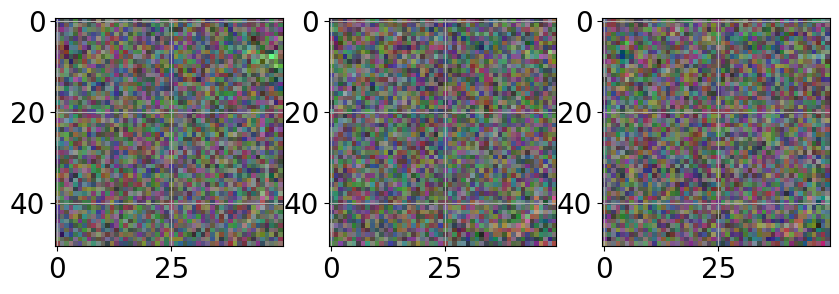

In [39]:
for i in range(3):
    subplot(1,3,i+1)
    vec=W[:,i]
    vec=(vec-W.min())/(W.max()-W.min())  # rescale to 0-1
    im=vec.reshape((50,50,3))
    imshow(im)

## Playing with reverse correlation -- not much useful here it turns out

In [128]:
X=rand(20000,7500)

In [129]:
C.output(X)[0].shape

(20000, 3)

In [130]:
y=C.output(X)[0]

In [131]:
output_images=[]
for v in y.T:
    v=atleast_2d(v)
    im_vec=(v.T*X).sum(axis=0)
    im_vec=(im_vec-im_vec.min())/(im_vec.max()-im_vec.min()) 
    im=im_vec.reshape(50,50,3)
    output_images.append(im)

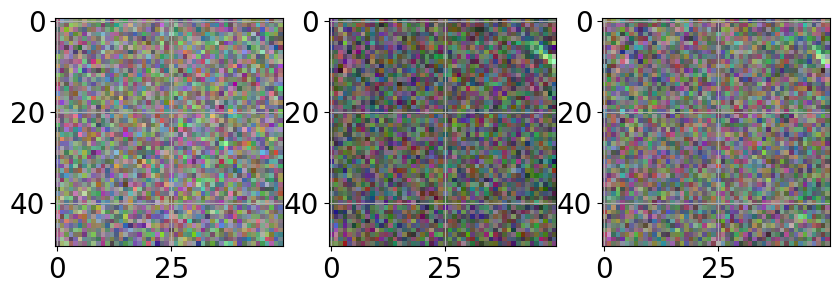

In [132]:
for i in range(3):
    subplot(1,3,i+1)
    imshow(output_images[i])

## Multiple layer, nonlinear

In [11]:
C=NumPyNetBackProp({
    'input':number_of_features,               # number of features
    'hidden':[(6,'logistic'),],   # this size is "arbitrary"
    'output':(number_of_categories,'logistic'),  # number of classes
    'cost':'mse',
})

In [12]:
C.fit(data_train.vectors,data_train.targets,epochs=500)   # you'll want to increase epochs here

layer       filters  size              input                output
   0 input                   128 x   1 x   1 x7500   ->   128 x   1 x   1 x7500
   1 connected               128 x   1 x   1 x7500   ->   128 x   4
   2 connected               128 x   1 x   1 x   4   ->   128 x   3
   3 cost                    128 x   1 x   1 x   3   ->   128 x   1 x   1 x   3


100%|█████████████████████████████████████████████████████████████| 500/500 [00:09<00:00, 55.00it/s]


In [13]:
print(("On Training Set:",C.percent_correct(data_train.vectors,data_train.targets)))
print(("On Test Set:",C.percent_correct(data_test.vectors,data_test.targets)))

('On Training Set:', 100.0)
('On Test Set:', 93.75)


In [14]:
len(C.weights)

2

In [15]:
W=C.weights[0]
W.shape

(7500, 4)

In [16]:
W=C.weights[1]
W.shape

(4, 3)

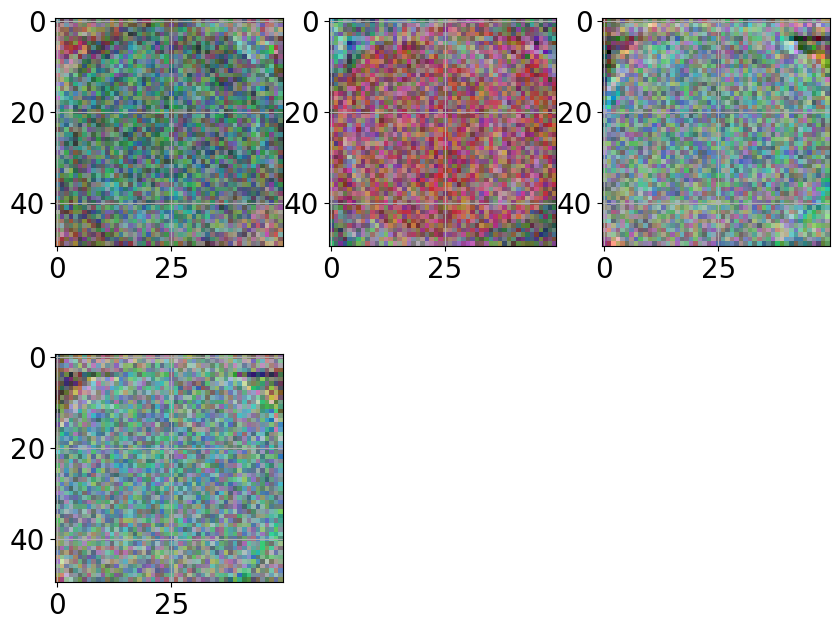

In [17]:
W=C.weights[0]
for i in range(4):
    subplot(2,3,i+1)
    vec=W[:,i]
    vec=(vec-W.min())/(W.max()-W.min())  # rescale to 0-1
    im=vec.reshape((50,50,3))
    imshow(im)

In [142]:
X=rand(20000,7500)
y=C.output(X)

In [143]:
y[0].shape

(20000, 6)

In [148]:
for i in range(11):
    pass
print(i)

10


In [150]:
from tqdm import tqdm

In [160]:
def reverse_correlation(C,N=20000):
    X=rand(N,7500)
    y=C.output(X)

    all_ims=[]
    for l in range(len(y)):    
        i=0
        ims=[]
        for v in y[l].T:
            v=atleast_2d(v)
            im_vec=(v.T*X).sum(axis=0)/N
            #im_vec=(im_vec-im_vec.min())/(im_vec.max()-im_vec.min()) 
            im=im_vec.reshape(50,50,3)

            ims.append(im)
    
            i+=1  
        all_ims.append(ims)

    return all_ims

In [161]:
all_ims=reverse_correlation(C)

In [162]:
for k,ims in enumerate(all_ims):
    for i,im in enumerate(ims):
        print(all_ims[k][i].min(),all_ims[k][i].max())


0.4807873234106165 0.49617256310955593
8.971473789586951e-10 9.311169579146237e-10
0.03794925019949974 0.039341052419938384
0.49265746249977 0.5084557928343395
3.2572195091308586e-07 3.371554584808241e-07
7.491676410561743e-10 7.806010653111116e-10
0.34837165698202166 0.35952180141505813
0.1186028897168755 0.12237885103522278
0.1517734717329242 0.1566716646781427


In [167]:
num_repeat=20  # 60 
for repeat in tqdm(range(num_repeat)):
    all_ims2=reverse_correlation(C)

    for k,ims in enumerate(all_ims2):
        for i,im in enumerate(ims):
            all_ims[k][i]+=im    


100%|███████████████████████████████████████████████████████████████| 20/20 [03:38<00:00, 10.92s/it]


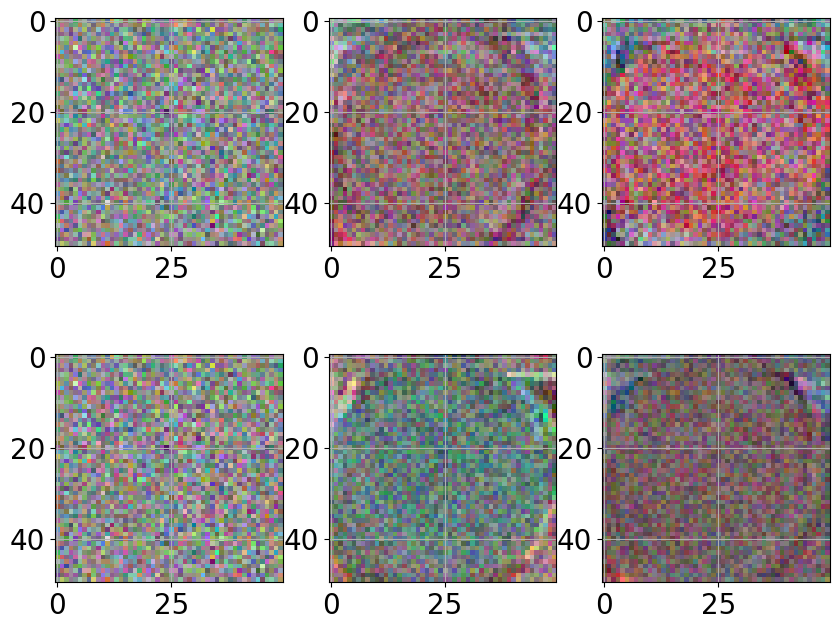

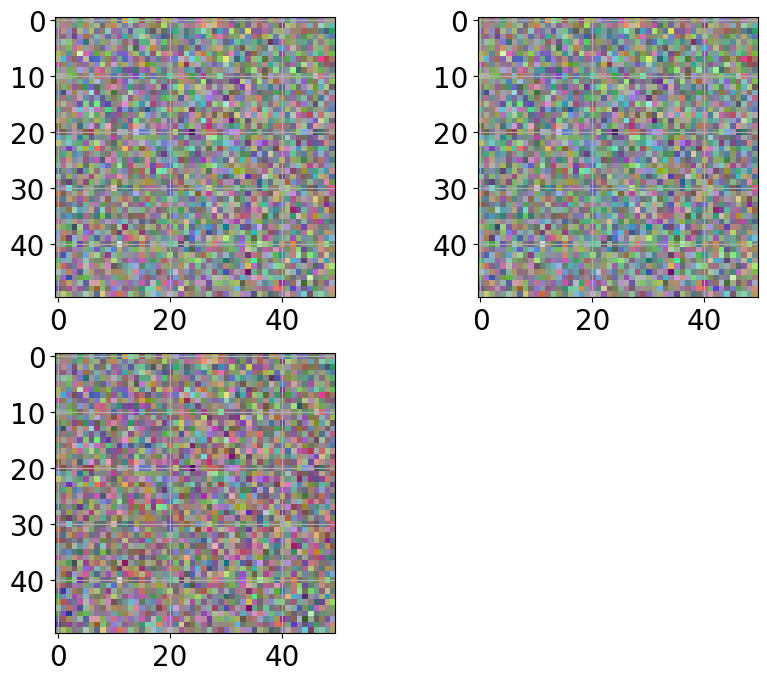

In [169]:
for ims in all_ims:
    figure()
    n=len(ims) 
    c=int(ceil(sqrt(n)))
    r=n//c
    if r*c<n:
        r+=1

    
    for i,im in enumerate(ims):
        subplot(r,c,i+1)

        im=(im-im.min())/(im.max()-im.min()) 
        imshow(im)